## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
from collections import deque
import networkx

## Create Graph as Dictionary with Five Levels of Connections

In [38]:
# Initializing graph origin

graph = {} # Graph will be defined as a dictionary

# Five unique first-level connections
graph['origin'] = ['a0','a1','a2','a3','a4'] 

# Create second-level connections
graph['a0'] = ['b1','b3','b5','b7','b9']
graph['a1'] = ['b0','b2','b4','b6','b8']
graph['a2'] = ['b4','b11','b9','b13','b15']
graph['a3'] = ['b3','b13','b10','b12','b14']
graph['a4'] = ['b12','b17','b19','b0','b16']

# Create third-level connections
graph['b0'] = ['c0','c1','c2','c3','c4']
graph['b1'] = ['c3','c4','c5','c6','c7']
graph['b2'] = ['c6','c7','c8','c9','c10']
graph['b3'] = ['c9','c10','c11','c12','c13']
graph['b4'] = ['c12','c13','c14','c15','c16']
graph['b5'] = ['c15','c16','c17','c18','c19']
graph['b6'] = ['c0','c4','c8','c12','c16']
graph['b7'] = ['c4','c6','c8','c10','c12']
graph['b8'] = ['c1','c4','c7','c10','c13']
graph['b9'] = ['c3','c5','c8','c13','c19']
graph['b10'] = ['c3','c19','c10','c8','c4']
graph['b11'] = ['c18','c11','c4','c3','c16']
graph['b12'] = ['c10','c5','c8','c13','c4']
graph['b13'] = ['c19','c1','c9','c12','c7']
graph['b14'] = ['c13','c9','c5','c0','c12']
graph['b15'] = ['c3','c12','c19','c7','c2']
graph['b16'] = ['c4','c13','c5','c7','c16']


# Create fourth=level connections
graph['c0'] = ['d0','d1','d2','d3','d4']
graph['c1'] = ['d3','d4','d5','d6','d7']
graph['c2'] = ['d6','d7','d8','d9','d10']
graph['c3'] = ['d9','d10','d11','d12','d13']
graph['c4'] = ['d12','d13','d14','d15','d16']
graph['c5'] = ['d15','d16','d17','d18','d19']
graph['c6'] = ['d0','d1','d3','d4','d9']
graph['c7'] = ['d3','d4','d6','d7','d8']
graph['c8'] = ['d9','d10','d12','d13','d16']
graph['c9'] = ['d12','d13','d15','d16','d19']
graph['c10'] = ['d15','d16','d18','d19','d4']
graph['c11'] = ['d0','d3','d6','d9','d12','d15']
graph['c12'] = ['d1','d4','d7','d10','d13']
graph['c13'] = ['d2','d5','d8','d11','d14']
graph['c14'] = ['d3','d9','d15','d18','d0']
graph['c15'] = ['d0','d4','d8','d12','d16']
graph['c16'] = ['d1','d8','d15','d3','d10']
graph['c17'] = ['d4','d9','d14','d3','d19']
graph['c18'] = ['d1','d13','d18','d5','d9']
graph['c19'] = ['d4','d17','d19','d11','d6']


# Create fifth-level connections
graph['d0'] = ['e0','e1','e2','e3','e4']
graph['d1'] = ['e2','e3','e4','e5','e6']
graph['d2'] = ['e4','e5','e6','e7','e8']
graph['d3'] = ['e6','e7','e8','e9','e10']
graph['d4'] = ['e8','e9','e10','e11','e12']
graph['d5'] = ['e10','e11','e12','e13','e14']
graph['d6'] = ['e12','e13','e14','e15','e16']
graph['d7'] = ['e14','e15','e16','e17','e18']
graph['d8'] = ['e16','e17','e18','e19','e20']
graph['d9'] = ['e0','e3','e6','e9','e12']
graph['d10'] = ['e1','e3','e5','e7','e9']
graph['d11'] = ['e1','e4','e7','e10','e13']
graph['d12'] = ['e2','e5','e8','e11','e14']
graph['d13'] = ['e1','e6','e11','e16','e20']
graph['d14'] = ['e0','e5','e10','e15','e20']
graph['d15'] = ['e2','e7','e12','e17','e1']
graph['d16'] = ['e3','e8','e13','e18','e11']
graph['d17'] = ['e2','e12','e14','e0','e8']
graph['d18'] = ['e2','e6','e12','e14','e18']
graph['d19'] = ['e0','e4','e8','e9','e15']

# Fifth level connections are empty set, we stop here
graph['e0'] = []
graph['e1'] = []
graph['e2'] = []
graph['e3'] = []
graph['e4'] = []
graph['e5'] = []
graph['e6'] = []
graph['e7'] = []
graph['e8'] = []
graph['e9'] = []
graph['e10'] = []
graph['e11'] = []
graph['e12'] = []
graph['e13'] = []
graph['e14'] = []
graph['e15'] = []
graph['e16'] = []
graph['e17'] = []
graph['e18'] = []
graph['e19'] = []
graph['e20'] = []

## Execute Breadth-First Search

In [58]:
def person_is_seller(name):
      return name[-1] == 'a3'

def search(name):
    search_queue = deque()
    search_queue += graph[name]
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if person not in searched:
            if person_is_seller(person):
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return False

In [59]:
'''
There are better ways to run this (with a more specific defined function), but they include setting 
other variables and take away from the search timing that we aim to attempt here. Consequently there will only be
isolated loops here where performing these actions at scale might be easier otherwise.
'''

# Initialize execution time lists for appending later

execution_first_level = []
execution_second_level = []
execution_third_level = []
execution_fourth_level = []

# Pick random numbers in the number range that Level-A nodes run
random.seed(14)

first_level_numbers = random.sample(range(5), 3)
first_level_search = []
for i in first_level_numbers:
    search_term = ''.join(['a',str(i)])
    first_level_search.append(search_term)

for i in first_level_search:
    t1 = time.perf_counter()
    result = search(i)
    t2 = time.perf_counter()
    execution = t2-t1
    execution_first_level.append(execution)

# Searching second level
random.seed(14)
second_level_numbers = random.sample(range(17), 3)
second_level_search = []
for i in second_level_numbers:
    search_term = ''.join(['b', str(i)])
    second_level_search.append(search_term)
for i in first_level_search:
    t1 = time.perf_counter()
    result = search(i)
    t2 = time.perf_counter()
    execution = t2-t1
    execution_second_level.append(execution)

# Searching third level
random.seed(14)
third_level_numbers = random.sample(range(20), 3)
third_level_search = []
for i in third_level_numbers:
    search_term = ''.join(['c', str(i)])
    third_level_search.append(search_term)
for i in first_level_search:
    t1 = time.perf_counter()
    result = search(i)
    t2 = time.perf_counter()
    execution = t2-t1
    execution_third_level.append(execution)
    
# Searching fourth level
random.seed(14)
fourth_level_numbers = random.sample(range(20), 3)
fourth_level_search = []
for i in fourth_level_numbers:
    search_term = ''.join(['d', str(i)])
    fourth_level_search.append(search_term)
for i in fourth_level_search:
    t1 = time.perf_counter()
    result = search(i)
    t2 = time.perf_counter()
    execution = t2-t1
    execution_fourth_level.append(execution)

## Converting Results to DataFrame

In [66]:
df = pd.DataFrame({
    'name' : '4',
    'searched_name' : [*first_level_search, *second_level_search, *third_level_search, *fourth_level_search],
    'execution_time' : [*execution_first_level, *execution_second_level,
                        *execution_third_level, *execution_fourth_level],
    'level' : [*['4','4','4'], *['3','3','3'],*['2','2','2'],*['1','1','1']]
})
df

,name,searched_name,execution_time,level
0,4,a0,0.000007,4
1,4,a1,0.000007,4
2,4,a3,0.000001,4
3,4,b3,0.000006,3
4,4,b7,0.000009,3
5,4,b4,0.000002,3
6,4,c3,0.000006,2
7,4,c16,0.000009,2
8,4,c7,0.000001,2
9,4,d3,0.000009,1


## Visualization

Text(0, 0.5, 'Execution Time (in Seconds)')

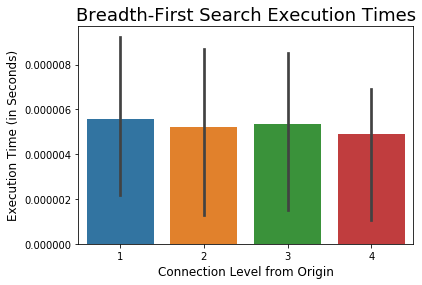

In [76]:
sns.barplot(x='level',y='execution_time', data=df)
plt.title('Breadth-First Search Execution Times', fontsize='18')
plt.xlabel('Connection Level from Origin', fontsize='12')
plt.ylabel('Execution Time (in Seconds)', fontsize='12')

## Summary

The largest differences here can be seen between the first and fourth levels - the first because it has the farthest to traverse (the setup here made it a directional graph), and the fourth because there were no more further graph levels to traverse. This means that the first level had the opportunity to queue five additional connections, increasing by an order of magnitude for each level it traversed. While it may not have taken this long (which is why we don't see an exponential trend between each level), it did lead to longer execution times for the first level.

Levels two and three remained somewhat steady, but level four saw a dropoff in execution time since each of its connections (level five, those prepended with 'e') had no connections themselves (though we did instantiate them as nodes with an empty set of connections). This meant that there were no additional nodes queued for search upon failure of a given node to meet the requirement that a node is found ending with the digit '4'.

The chief takeaway is that searching through a graph in the fashion of breadth-first search can grow at a rate of $O(V+E)$, since the implementation of a breadth-first search algorithm does not check the same node multiple times. This means that the worst-case runtime checks every node (vertex, V) and the nodes at each end of its edges (E).

What this essentially means as that searching the graph (via breadth-first) gets more complex as the number of new nodes are introduced - having the same nodes more interconnected will not necessarily increase search time (and may, on the contrary, decrease it since odds are increased that a satisfactory node is included in a given origin node's connections).